<a href="https://colab.research.google.com/github/lua1235/TornML/blob/main/Testbed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#GET DATASET FROM GOOGLE SHEETS


In [6]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('Torn ML DataSet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get('J2:CX')
rows[1:] = [[np.float64(i) for i in r] for r in rows[1:]]

view = pd.DataFrame(rows[1:], columns=rows[0])

# normalize
lMean = view['Stat Totals'].mean()
lStd = view['Stat Totals'].std()

view = (view - view.mean())/view.std()
labels = view['Stat Totals'].to_numpy()
features = view[view.columns[1:]].to_numpy()
print(view.shape)
print(labels.shape)
print(features.shape)

features = np.append(np.ones((len(features), 1)), features, 1) # append a column of 1s for bias term



(178, 93)
(178,)
(178, 92)


#CORRELATION VISUALIZATION

<Axes: xlabel='refills', ylabel='Stat Totals'>

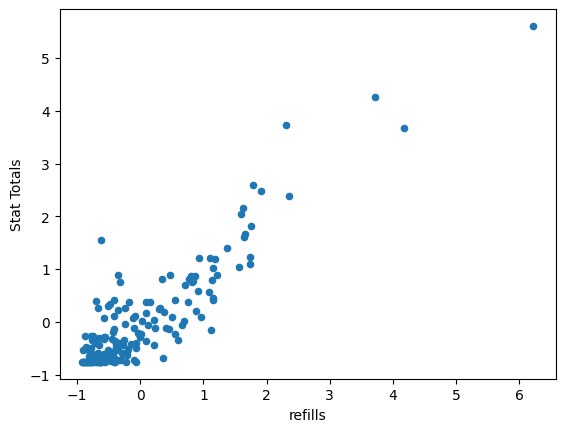

In [6]:
view.plot(x="refills", y="Stat Totals",kind="scatter")

# Batch GD Regression Learner
Using squared loss

In [7]:
# X - (n, d+1) matrix of features
# Y - (n, 1) vector of labels

def learner(X, y, step_function, random_seed = 1, epochs = 10) :
  n, d = X.shape()
  w = np.random.default_rng(random_seed).random((d, 1)) # random weight initialization

  for i in range(epochs) :
    gradient = (2/n) * (X.T @ (X @ w - y))
    w = w - gradient

  # x - (d, 1) vector of features
  def predictor(x) :
    return x @ w

  return predictor, w

#Training and Testing

In [ ]:
# split the
n = len(features)
test_features = features[:(n + 1) // 2]
test_labels = labels[:(n + 1) // 2]

train_features = features[(n + 1) // 2:]
train_labels = features[(n + 1) // 2:]